In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
df_beer = pd.read_csv(r"C:\Users\nupur\Desktop\input\beers.csv")
df_brew = pd.read_csv(r"C:\Users\nupur\Desktop\input\breweries.csv")

df_brew['brewery_id'] = df_brew.index

df = df_beer.merge(df_brew, on="brewery_id")
print(df.head())
df=df.dropna(how='any')
print(df.head())

df['id']=df.id.astype(float)
df['brewery_id ']=df.brewery_id.astype(float)
df['style'] = pd.to_numeric(df['style'], errors='coerce')
df = df.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})

## these 2 columns are just the index as well as the brewery ID repeated
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
## Make ABV a percentage for readability in the plots
df['abv'] = df['abv']*100
print(df.head())


   Unnamed: 0_x    abv  ibu    id               name_x  \
0             0  0.050  NaN  1436             Pub Beer   
1             1  0.066  NaN  2265          Devil's Cup   
2             2  0.071  NaN  2264  Rise of the Phoenix   
3             3  0.090  NaN  2263             Sinister   
4             4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  Unnamed: 0_y  \
0             American Pale Lager         408    12.0           408   
1         American Pale Ale (APA)         177    12.0           177   
2                    American IPA         177    12.0           177   
3  American Double / Imperial IPA         177    12.0           177   
4                    American IPA         177    12.0           177   

                      name_y  city state  
0  10 Barrel Brewing Company  Bend    OR  
1        18th Street Brewery  Gary    IN  
2        18th Street Brewery  Gary    IN  
3        18th Street Brewery  Gary    IN  
4        

In [2]:
print(df.head())


    abv   ibu      id                             beer_name  style  \
14  6.1  60.0  1979.0                          Bitter Bitch    NaN   
21  9.9  92.0  1036.0                         Lower De Boom    NaN   
22  7.9  45.0  1024.0                         Fireside Chat    NaN   
24  4.4  42.0   876.0                       Bitter American    NaN   
25  4.9  17.0   802.0  Hell or High Watermelon Wheat (2009)    NaN   

    brewery_id  ounces            brewery_name           city state  \
14         177    12.0     18th Street Brewery           Gary    IN   
21         368     8.4  21st Amendment Brewery  San Francisco    CA   
22         368    12.0  21st Amendment Brewery  San Francisco    CA   
24         368    12.0  21st Amendment Brewery  San Francisco    CA   
25         368    12.0  21st Amendment Brewery  San Francisco    CA   

    brewery_id   
14        177.0  
21        368.0  
22        368.0  
24        368.0  
25        368.0  


In [3]:
df['abv'] = df['abv']*10
print(df.head())

     abv   ibu      id                             beer_name  style  \
14  61.0  60.0  1979.0                          Bitter Bitch    NaN   
21  99.0  92.0  1036.0                         Lower De Boom    NaN   
22  79.0  45.0  1024.0                         Fireside Chat    NaN   
24  44.0  42.0   876.0                       Bitter American    NaN   
25  49.0  17.0   802.0  Hell or High Watermelon Wheat (2009)    NaN   

    brewery_id  ounces            brewery_name           city state  \
14         177    12.0     18th Street Brewery           Gary    IN   
21         368     8.4  21st Amendment Brewery  San Francisco    CA   
22         368    12.0  21st Amendment Brewery  San Francisco    CA   
24         368    12.0  21st Amendment Brewery  San Francisco    CA   
25         368    12.0  21st Amendment Brewery  San Francisco    CA   

    brewery_id   
14        177.0  
21        368.0  
22        368.0  
24        368.0  
25        368.0  


In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create a fitted model in one line
lm = smf.ols(formula='ibu ~ abv', data=df).fit()
# print the coefficients
lm.params


C:\Users\nupur\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Intercept   -34.067645
abv           1.281861
dtype: float64

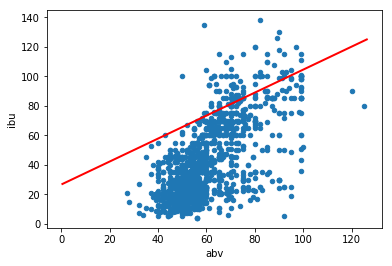

In [5]:
X_new = pd.DataFrame({'abv': [df.abv.min(), df.abv.max()]})
X_new.head()

import statsmodels.base.model

X = df[["abv"]]
y = df[["ibu"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# first, plot the observed data
df.plot(kind='scatter', x='abv', y='ibu')
preds = results.predict(X_new)
# then, plot the least squares line
plt.plot(preds, X_new, c='red', linewidth=2)

In [6]:
#Kolmogorov-Smirnov test
from scipy import stats


In [7]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,-38.631955,-29.503335
abv,1.207570,1.356152


In [8]:
# print the p-values for the model coefficients
lm.pvalues

Intercept     2.811864e-45
abv          4.994444e-184
dtype: float64

In [9]:
# print the R-squared value for the model
lm.rsquared

0.44986855092122935

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ibu   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          4.99e-184
Time:                        19:43:17   Log-Likelihood:                -6140.2
No. Observations:                1403   AIC:                         1.228e+04
Df Residuals:                    1401   BIC:                         1.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.0676      2.327    -14.642      0.000     -38.632     -29.503
abv            1.2819      0.038     33.848      0.000       1.208       1.356
==============================================================================
Omnibus:                       30.532   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.989
Skew:                           0.075   Prob(JB):                     5.71e-14
Kurtosis:                       4.010   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

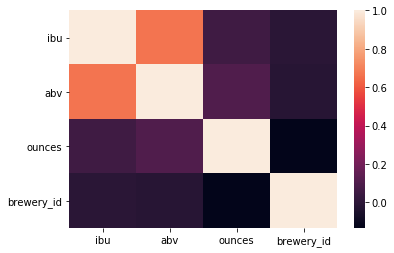

In [12]:
import seaborn as sns
data_corr = df[["ibu","abv" ,"ounces", "brewery_id"]]

sns.heatmap(data_corr.corr())

In [17]:
#FROM ABOVE WE SEE THERE IS HIGH CORRELATION BETWEEN ABV AND IBU ONLY. 
df['abv'] = df['abv']/10
df['abv'] = df['abv']*100
df.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state,brewery_id
14,61.0,60.0,1979.0,Bitter Bitch,NaN,177,12.0,18th Street Brewery,Gary,IN,177.0
21,99.0,92.0,1036.0,Lower De Boom,NaN,368,8.4,21st Amendment Brewery,San Francisco,CA,368.0
22,79.0,45.0,1024.0,Fireside Chat,NaN,368,12.0,21st Amendment Brewery,San Francisco,CA,368.0
24,44.0,42.0,876.0,Bitter American,NaN,368,12.0,21st Amendment Brewery,San Francisco,CA,368.0
25,49.0,17.0,802.0,Hell or High Watermelon Wheat (2009),NaN,368,12.0,21st Amendment Brewery,San Francisco,CA,368.0


In [20]:
from patsy import dmatrices
y, X = dmatrices('ibu ~ abv + brewery_id', df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,22.9,Intercept
1,1.0,abv
2,1.0,brewery_id


In [21]:
#there is little collinearity between the models.
X = df[["abv","brewery_id"]]
y = df[["ibu"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[-34.30522026] [[  1.28205196e+00   1.01227747e-03]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ibu   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3451.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:15:31   Log-Likelihood:                -6231.2
No. Observations:                1403   AIC:                         1.247e+04
Df Residuals:                    1401   BIC:                         1.248e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
abv            0.7925      0.015     52.399      0.000       0.763       0.822
brewery_id    -0.0145      0.003     -4.214      0.000      -0.021      -0.008
==============================================================================
Omnibus:                       59.176   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.668
Skew:                           0.521   Prob(JB):                     5.50e-15
Kurtosis:                       3.197   Cond. No.                         7.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.44990292228652795

Text(0,0.5,'Predicted ibu')

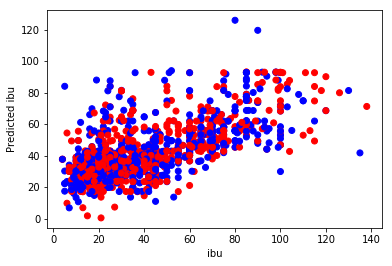

In [23]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(df.ibu,lm.predict(X),color=["red","blue"])
plt.xlabel("ibu")
plt.ylabel("Predicted ibu")

In [28]:
import numpy as py
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
y_m=py.mean(y)
y_m

ibu    42.739843
dtype: float64

In [29]:
from sklearn import metrics
rmse = py.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

19.249283113995311

In [30]:
rmse/y_m

ibu    0.450383
dtype: float64

In [ ]:
#Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression


df_beer1 = pd.read_csv(r"C:\Users\nupur\Desktop\input\beers.csv")
df_brew1 = pd.read_csv(r"C:\Users\nupur\Desktop\input\breweries.csv")

df_brew1['brewery_id'] = df_brew1.index

df1 = df_beer1.merge(df_brew1, on="brewery_id")
print(df1.head())
df1=df1.dropna(how='any')
print(df1.head())

df1['id']=df1.id.astype(float)
df1['brewery_id ']=df1.brewery_id.astype(float)
df1['style'] = pd.to_numeric(df1['style'], errors='coerce')
df1 = df1.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})

## these 2 columns are just the index as well as the brewery ID repeated
df1 = df1.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
## Make ABV a percentage for readability in the plots
df1['abv'] = df1['abv']*100
print(df1.head())





   Unnamed: 0_x    abv  ibu    id               name_x  \
0             0  0.050  NaN  1436             Pub Beer   
1             1  0.066  NaN  2265          Devil's Cup   
2             2  0.071  NaN  2264  Rise of the Phoenix   
3             3  0.090  NaN  2263             Sinister   
4             4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  Unnamed: 0_y  \
0             American Pale Lager         408    12.0           408   
1         American Pale Ale (APA)         177    12.0           177   
2                    American IPA         177    12.0           177   
3  American Double / Imperial IPA         177    12.0           177   
4                    American IPA         177    12.0           177   

                      name_y  city state  
0  10 Barrel Brewing Company  Bend    OR  
1        18th Street Brewery  Gary    IN  
2        18th Street Brewery  Gary    IN  
3        18th Street Brewery  Gary    IN  
4        

In [41]:
from patsy import dmatrices



y, X = dmatrices('ibu ~ id', df1, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,4.5,Intercept
1,1.0,id


In [42]:
from patsy import dmatrices



y, X = dmatrices('ibu ~ abv', df1, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,20.5,Intercept
1,1.0,abv


In [43]:
lm = smf.ols(formula='abv ~ ibu ', data=df1).fit()


In [44]:
# print the coefficients
lm.params

Intercept    4.491921
ibu          0.035095
dtype: float64

In [45]:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          4.99e-184
Time:                        21:31:29   Log-Likelihood:                -2000.9
No. Observations:                1403   AIC:                             4006.
Df Residuals:                    1401   BIC:                             4016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4919      0.052     86.641      0.000       4.390       4.594
ibu            0.0351      0.001     33.848      0.000       0.033       0.037
==============================================================================
Omnibus:                      309.094   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.732
Skew:                           1.170   Prob(JB):                    1.31e-169
Kurtosis:                       5.797   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X = df1[["ibu"]]
y = df1[["abv"]]


model = LogisticRegression(random_state=0)
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.34027601 -0.03060839 -0.12157362 ..., -3.87118073 -3.87148274
 -3.87178469] [[-0.62435026]
 [-0.37224176]
 [-0.33154077]
 ..., 
 [-0.00192667]
 [-0.00192601]
 [-0.00192535]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                -6.073e+33
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               1.00
Time:                        21:42:34   Log-Likelihood:                 38306.
No. Observations:                1403   AIC:                        -7.661e+04
Df Residuals:                    1402   BIC:                        -7.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ibu            1.0000   5.59e-18   1.79e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.123   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.771
Skew:                           0.266   Prob(JB):                     2.00e-30
Kurtosis:                       1.566   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm = LogisticRegression()
lm.fit(X, y)
lm.score(X, y)


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0014255167498218105

Text(0,0.5,'abv')

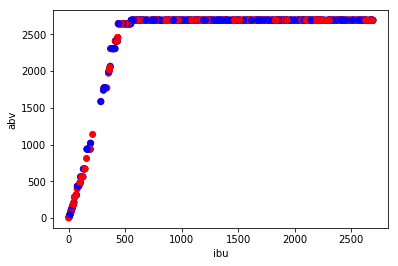

In [50]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(df1.ibu,lm.predict(X),color=["red","blue"])
plt.xlabel("ibu")
plt.ylabel("abv")

In [51]:
X = df1[["ibu"]]
y = df1[["abv"]]

model = LogisticRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.34027601 -0.03060839 -0.12157362 ..., -3.87118073 -3.87148274
 -3.87178469] [[-0.62435026]
 [-0.37224176]
 [-0.33154077]
 ..., 
 [-0.00192667]
 [-0.00192601]
 [-0.00192535]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                -6.073e+33
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               1.00
Time:                        21:47:24   Log-Likelihood:                 38306.
No. Observations:                1403   AIC:                        -7.661e+04
Df Residuals:                    1402   BIC:                        -7.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ibu            1.0000   5.59e-18   1.79e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.123   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.771
Skew:                           0.266   Prob(JB):                     2.00e-30
Kurtosis:                       1.566   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#from sklearn.linear_model import LinearRegression
lm = LogisticRegression()
lm.fit(X, y)
lm.score(X, y)

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0014255167498218105

Text(0,0.5,'Predicted ibu')

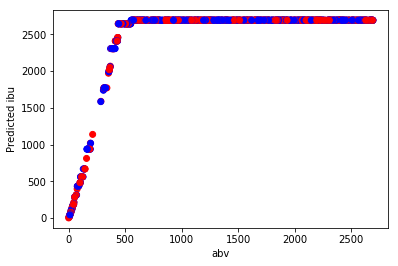

In [56]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(df1.abv,lm.predict(X),color=["red","blue"])
plt.xlabel("abv")
plt.ylabel("Predicted ibu")

In [57]:
linreg = LogisticRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
y_m=py.mean(y_pred)
y_m

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2504.9166072701355

In [58]:
from sklearn import metrics
rmse = py.sqrt(metrics.mean_squared_error(y, y_pred))
rmse


1276.3127799204112

In [59]:
rmse / y_m

0.50952306205169051

In [61]:

#Regularization

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5,1,'abv vs Predicted ibu: $Y_i$ vs $\\hat{y}_i$')

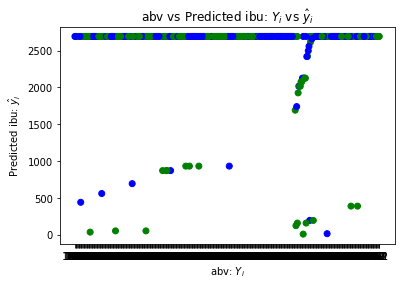

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

linreg = LogisticRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred,color=["Green","blue"])
plt.xlabel("abv: $Y_i$")
plt.ylabel("Predicted ibu: $\hat{y}_i$")
plt.title("abv vs Predicted ibu: $Y_i$ vs $\hat{y}_i$")


In [65]:
#Goodness of fit

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print (confusion)
print (linreg.score(y_test,y_pred))

[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]
1.0


In [66]:
#Accuracy calculation

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          4       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         1
         31       0.00      0.00      0.00         1
         35       0.00      0.00      0.00         1
         36       0.00      0.00      0.00         0
         42       0.00      0.00      0.00         1
         46       0.00      0.00      0.00         1
         48       0.00      0.00      0.00         1
         53       0.00      0.00      0.00         0
         78       0.00      0.00      0.00         1
         83       0.00      0.00      0.00         1
        105       0.00      0.00      0.00         1
        119       0.00      0.00      0.00   

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [67]:
rmse = py.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

y_m = py.mean(y_pred)

rmse/y_m

0.50004911549741971

In [68]:
# RMSE using k-fold cross-validation
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    linreg.fit(X_train, y_train)
    scores.append(py.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
scores

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1274.2688658669388,
 1274.2688658669388,
 1274.2688658669388,
 1274.2688658669388,
 1274.2688658669388]